In [100]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from pprint import pprint
import warnings

font_path = 'C:/Windows/Fonts/KoPubBatangMedium.ttf'
fontprop = fm.FontProperties(fname = font_path)

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "gray",
    "grid.linestyle": "dashed",
    'grid.linewidth': '0.5',
    "axes.labelcolor": "#000000",
    "font.family":fontprop.get_name(),
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

plt.rc('axes', unicode_minus = 'False')

sns.set(rc=rc)
warnings.filterwarnings(action = 'ignore')

# **공분산**

# **예제 데이터 생성**

**적절히 상관관계를 보이는 X,Y 변수를 만든 후 적정량의 nosie 를 넣어주도록 하겠다**

In [101]:
X = np.linspace(0,10,100)
noise = np.random.randn(1,100) 
y = 3 * X + noise * 5


X,y = X.reshape(-1,1), y.reshape(-1,1)

Text(0, 0.5, 'Y')

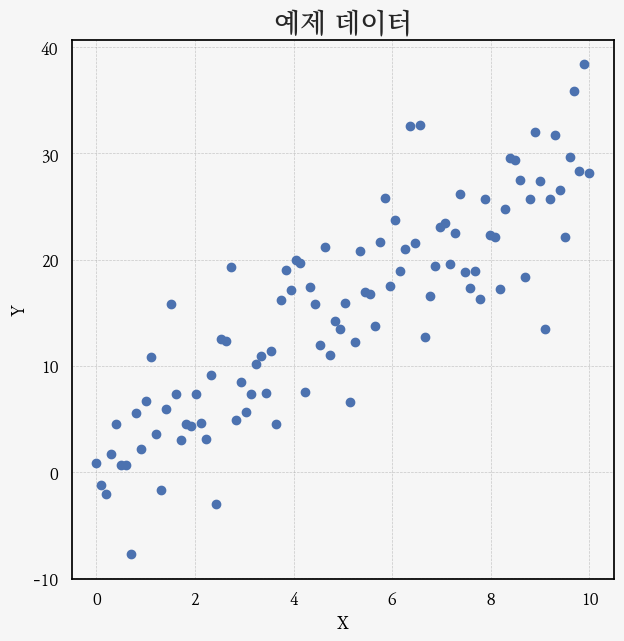

In [102]:
fig,ax = plt.subplots(figsize =  (7,7))

ax.scatter(X,y)
ax.set_title('예제 데이터', fontsize = 20)
ax.set_xlabel('X')
ax.set_ylabel('Y')

Text(0.5, 1.0, '공분산이란 X와 Y 변수로부터 각 데이터의 오차 곱의 평균')

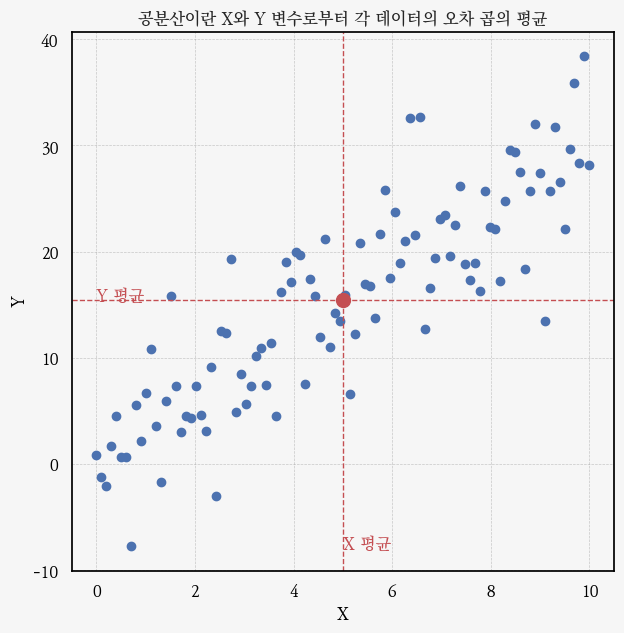

In [103]:
x_mean = np.mean(X)
y_mean = np.mean(y)


fig,ax = plt.subplots(figsize =  (7,7))

ax.scatter(X,y)
ax.set_xlabel('X')
ax.set_ylabel('Y')


ax.axvline(x_mean, c = 'r', ls = '--', lw = 1)
ax.axhline(y_mean, c = 'r', ls = '--', lw = 1)

ax.text(x_mean,- 8 ,'X 평균', c = 'r')
ax.text(0,y_mean,'Y 평균', c = 'r')

ax.scatter(x_mean,y_mean, c = 'r', s = 100)

ax.set_title('공분산이란 X와 Y 변수로부터 각 데이터의 오차 곱의 평균')

In [104]:
def distance(data,value):
    
    return round(data - value,2)

In [105]:
# 공분산 구하기 

x_mean = np.mean(X)
y_mean = np.mean(y)
num = len(X)
cov = 0

for x_i,y_i in zip(X,y):
    
    cov += (x_i - x_mean) * (y_i - y_mean)
    
cov /= num -1

print('X 와 y 의 공분산은', cov, end = '\t')

X 와 y 의 공분산은 [25.06649897]	

Text(7.5, 4, 'X 오차 : 2.0\nY 오차 : -11.41\n공분산 : -23')

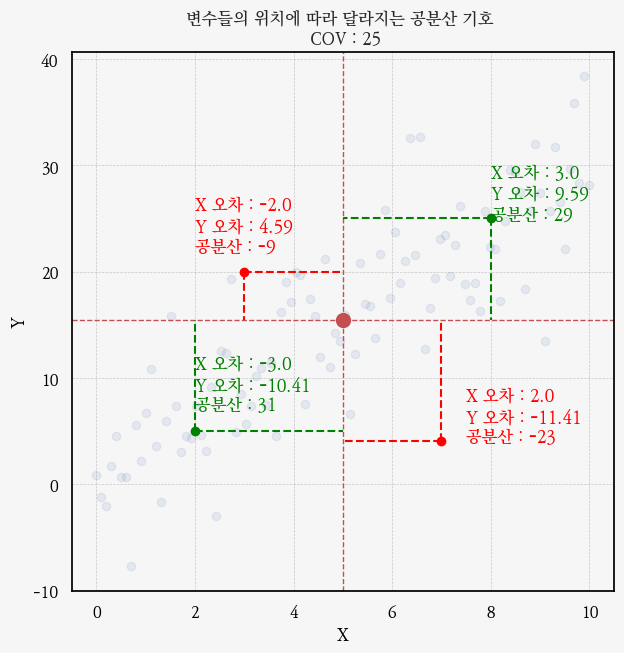

In [106]:
x_mean = np.mean(X)
y_mean = np.mean(y)


fig,ax = plt.subplots(figsize =  (7,7))

ax.scatter(X,y, alpha = 0.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')


ax.axvline(x_mean, c = 'r', ls = '--', lw = 1)
ax.axhline(y_mean, c = 'r', ls = '--', lw = 1)

ax.scatter(x_mean,y_mean, c = 'r', s = 100)

ax.set_title(f'변수들의 위치에 따라 달라지는 공분산 기호 \n COV : {round(cov[0])}')


# 임의의 point 생성 

ax.scatter(2,5, c = 'green')
ax.plot([2,x_mean],[5,5], c = 'green',ls = '--')
ax.plot([2,2],[5,y_mean],c = 'green',ls = '--')
ax.text(2,7, f'X 오차 : {distance(2,x_mean)}\nY 오차 : {distance(5,y_mean)}\n공분산 : {round(distance(2,x_mean) * distance(5,y_mean))}',
        c = 'green')

ax.scatter(8,25, c = 'green')
ax.plot([8,x_mean],[25,25], c = 'green',ls = '--')
ax.plot([8,8],[25,y_mean],c = 'green',ls = '--')
ax.text(8,25, f'X 오차 : {distance(8,x_mean)}\nY 오차 : {distance(25,y_mean)}\n공분산 : {round(distance(8,x_mean) * distance(25,y_mean))}',
        c = 'green')

ax.scatter(3,20, c = 'red')
ax.plot([3,x_mean],[20,20], c = 'red',ls = '--')
ax.plot([3,3],[20,y_mean],c = 'red',ls = '--')
ax.text(2,22, f'X 오차 : {distance(3,x_mean)}\nY 오차 : {distance(20,y_mean)}\n공분산 : {round(distance(3,x_mean) * distance(20,y_mean))}',
        c = 'red')

ax.scatter(7,4, c = 'red')
ax.plot([7,x_mean],[4,4], c = 'red',ls = '--')
ax.plot([7,7],[4,y_mean],c = 'red',ls = '--')
ax.text(7.5,4, f'X 오차 : {distance(7,x_mean)}\nY 오차 : {distance(4,y_mean)}\n공분산 : {round(distance(7,x_mean) * distance(4,y_mean))}',
        c = 'red')

### **공분산은 두 변량의 변화 방향을 알 수 있으나 변화량을 정량적으로 알기는 힘들다**

Text(0.5, 1.1, '두 데이터의 방향성은 같으나 데이터의 스케일이 달라 공분산의 값이 차이가 크다')

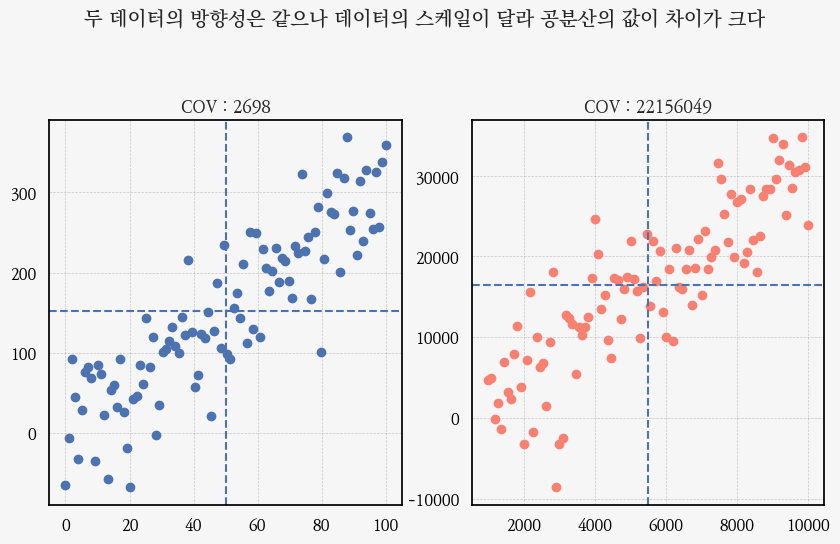

In [107]:
fig,ax = plt.subplots(ncols = 2, figsize = (10,5))

x_1,x_2 = np.linspace(0,100,100), np.linspace(1000,10000,100)
noise_1 = np.random.randn(100)
noise_2 = np.random.randn(100)
y_1,y_2 = x_1 * 3 + noise_1 * 50, x_2 * 3 + noise_2 * 5000

cov_1 = round(np.cov(x_1,y_1)[0,1])
cov_2 = round(np.cov(x_2,y_2)[0,1])

ax[0].scatter(x_1,y_1)
ax[0].set_title(f'COV : {cov_1}')
ax[0].axvline(np.mean(x_1), ls = '--')
ax[0].axhline(np.mean(y_1), ls = '--')



ax[1].scatter(x_2,y_2, c = 'salmon')
ax[1].set_title(f'COV : {cov_2}')

ax[1].axvline(np.mean(x_2), ls = '--')
ax[1].axhline(np.mean(y_2), ls = '--')

fig.suptitle('두 데이터의 방향성은 같으나 데이터의 스케일이 달라 공분산의 값이 차이가 크다', y = 1.1)

* **정량적으로 알기 위해 두 변량의 표준편차의 곱으로 나눠 최소값과 최대값이 -1 과 1 사이에 두도록 정규화해주곤 한다**

Text(0.5, 1.1, '두 데이터의 공분산을 표준편차의 곱으로 정량화')

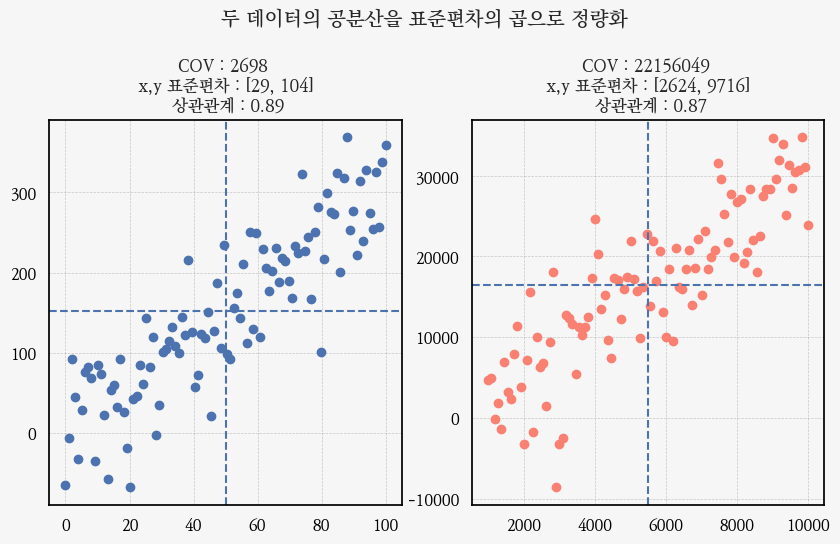

In [108]:
fig,ax = plt.subplots(ncols = 2, figsize = (10,5))


cov_1 = round(np.cov(x_1,y_1)[0,1])
cov_2 = round(np.cov(x_2,y_2)[0,1])

std_x_1,std_y_1 = np.std(x_1), np.std(y_1)
std_x_2,std_y_2 = np.std(x_2), np.std(y_2)


ax[0].scatter(x_1,y_1)
ax[0].set_title(f'COV : {cov_1} \n x,y 표준편차 : {[round(std_x_1),round(std_y_1)]} \n 상관관계 : {round(cov_1 / (std_x_1 * std_y_1),2)}')
ax[0].axvline(np.mean(x_1), ls = '--')
ax[0].axhline(np.mean(y_1), ls = '--')



ax[1].scatter(x_2,y_2, c = 'salmon')
ax[1].set_title(f'COV : {cov_2} \n x,y 표준편차 : {[round(std_x_2),round(std_y_2)]} \n 상관관계 : {round(cov_2 / (std_x_2 * std_y_2),2)}')

ax[1].axvline(np.mean(x_2), ls = '--')
ax[1].axhline(np.mean(y_2), ls = '--')

fig.suptitle('두 데이터의 공분산을 표준편차의 곱으로 정량화', y = 1.1)

In [109]:
R = cov / (np.std(X) * np.std(y))

print('표준화된 상관 관계는 : ',round(R[0],2))

표준화된 상관 관계는 :  0.87


# **선형 대수학 관점에서 보자**

**상관관계 공식에서 X - X_mean 과 Y - Y -mean 을 벡터로 보자**

**벡터 X 와 벡터 Y의 방향이 유사 할 수록 두 벡터의 사이값은 커지며 동일할 경우엔 1이 된다.**

**두 벡터의 방향이 다를 경우 벡터의 사이값은 작아지며 최소 -1 까지 작아진다.**

Text(0.5, 1.1, 'X - X_mean , Y - Y_mean 으로 스케일링 해서 보자')

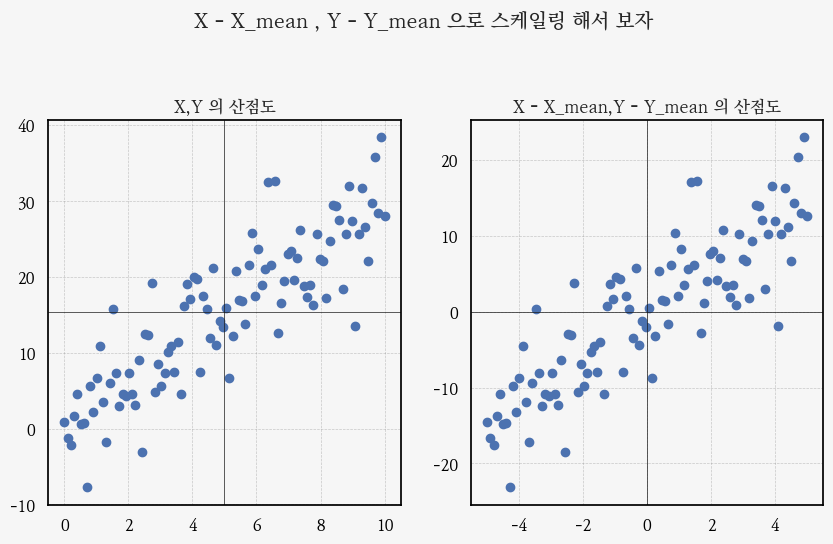

In [120]:
fig,ax = plt.subplots(ncols = 2, figsize = (10,5))

ax[0].scatter(X,y)
ax[0].axvline(np.mean(X),lw = 0.5, c = 'k')
ax[0].axhline(np.mean(y), lw = 0.5, c = 'k')
ax[0].set_title('X,Y 의 산점도')

X_hat = X - np.mean(X)
y_hat = y - np.mean(y)

ax[1].scatter(X_hat,y_hat)
ax[1].axvline(np.mean(X_hat),lw = 0.5, c = 'k')
ax[1].axhline(np.mean(y_hat), lw = 0.5, c = 'k')
ax[1].set_title('X - X_mean,Y - Y_mean 의 산점도')

fig.suptitle('X - X_mean , Y - Y_mean 으로 스케일링 해서 보자', y = 1.1)

In [111]:
def get_cos(x,y):
    
    x_norm = np.linalg.norm(x)
    y_norm = np.linalg.norm(y)
    
    xy = np.dot(x,y)
    
    return round(xy/(x_norm * y_norm),1)

Text(0.5, 1.1, '두 열벡터의 상관관계는 두 벡터가 이루는 사이각')

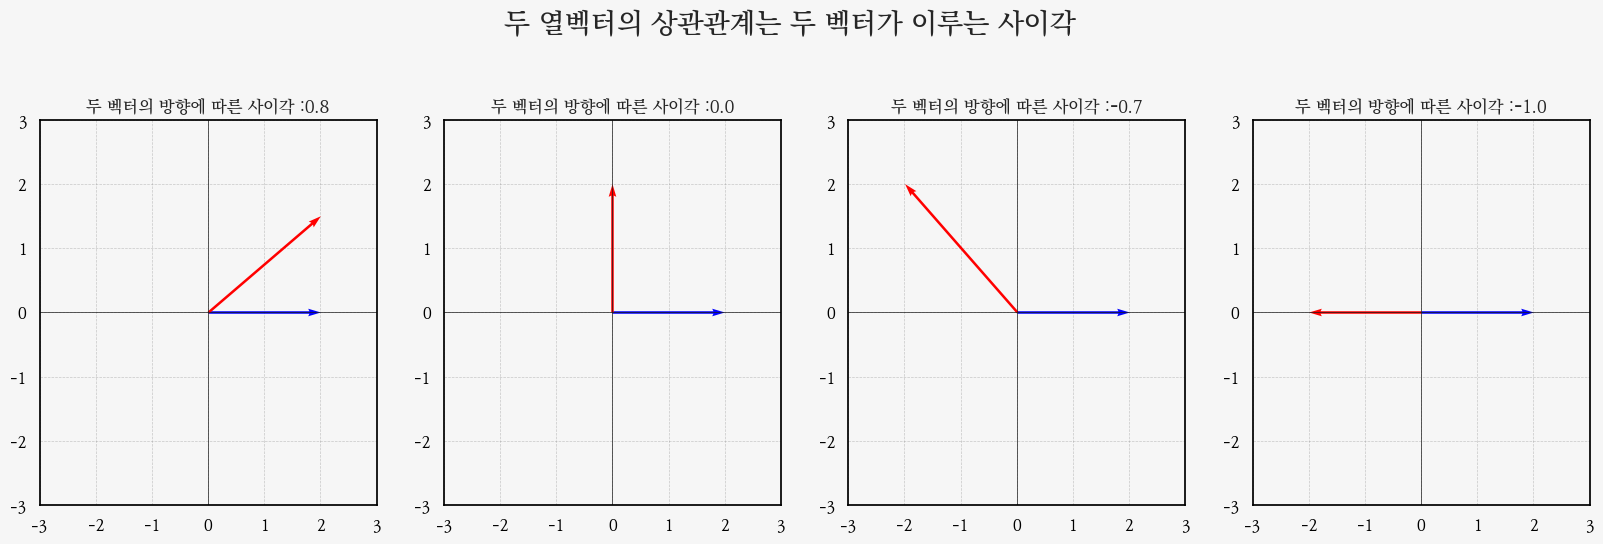

In [112]:
fig,ax = plt.subplots(ncols = 4, figsize = (20,5))

vectors = [np.array([2,1.5]), np.array([0,2]), np.array([-2,2]),np.array([-2,0])]

x_vector = np.array([2,0])

for i in range(4):
    
    ax[i].set_xlim(-3,3)
    ax[i].set_ylim(-3,3)
    ax[i].axvline(0, c = 'k', lw = 0.5)
    ax[i].axhline(0, c = 'k', lw = 0.5)
    ax[i].quiver(0,0,x_vector[0],x_vector[1],units = 'xy',scale_units = 'xy', scale  = 1,angles = 'xy', color = 'blue')
    ax[i].quiver(0,0,vectors[i][0], vectors[i][1],units = 'xy',scale_units = 'xy', scale  = 1,angles = 'xy', color = 'red')
    
    cos = get_cos(x_vector, vectors[i])
    
    ax[i].set_title(f'두 벡터의 방향에 따른 사이각 :{cos}')
    
fig.suptitle('두 열벡터의 상관관계는 두 벡터가 이루는 사이각',fontsize = 20, y = 1.1)

### **선형 대수학 관점에서 두 변수의 상관관계는 두 벡터가 이루는 사이각과 같다**

* 위 그래프에서 나타난 변수 X와 Y의 상관관계를 벡터 관점에서 구해보자 

In [121]:
# 벡터의 평균을 빼서 x - mean , y - mean 을 벡터화

x_hat = X - x_mean
y_hat = y - y_mean

xy = np.dot(x_hat.T,y_hat)
x_norm = np.linalg.norm(x_hat)
y_norm = np.linalg.norm(y_hat)

corr = xy / (x_norm * y_norm)

print('X 와 Y 의 사이각(상관 관계)은 ',round(corr[0][0],2))

X 와 Y 의 사이각(상관 관계)은  0.86
